In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv(r"D:\sofronics\Datasets\Iris.csv")

In [6]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [9]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [10]:
df.shape

(150, 6)

In [11]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['Species']=encoder.fit_transform(df['Species'])


In [12]:
dff=df.drop('Id',axis=1)

In [13]:
x=dff.drop('Species',axis=1)
y=dff['Species']

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [15]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)

StandardScaler()

In [16]:
import pickle as pkl

# 'w'stands for "write" mode,which means that the file is opened for writing.
# if the file doesn't exist, it will be created.If the file already exists, its contents will be overwritten
# 'b' stands fro "binary" mode. This is an optional mode that can be added when opening a file in python
# it indicates thet the file should be opened in binary mode,which is suitable for handling non-text files like images,
# models,or serialized data

pkl.dump(scaler,open('D:\sofronics\models\scaler.pkl','wb'))

In [17]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier=RandomForestClassifier(n_estimators=10,random_state=1)
rf_classifier.fit(x_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=1)

In [18]:
from sklearn.metrics import f1_score,confusion_matrix,accuracy_score,recall_score,precision_score,classification_report
y_pred=rf_classifier.predict(x_test)

In [19]:
accuracy_score=accuracy_score(y_test,y_pred)
print(accuracy_score)

0.9555555555555556


In [20]:
f1=f1_score(y_test,y_pred,average='macro')
print(f1)

0.9558404558404558


In [21]:
r_score=recall_score(y_test,y_pred,average='macro')
print(r_score)

0.9558404558404558


In [22]:
pr_score=precision_score(y_test,y_pred,average='macro')
print(pr_score)

0.9558404558404558


[[14  0  0]
 [ 0 17  1]
 [ 0  1 12]]


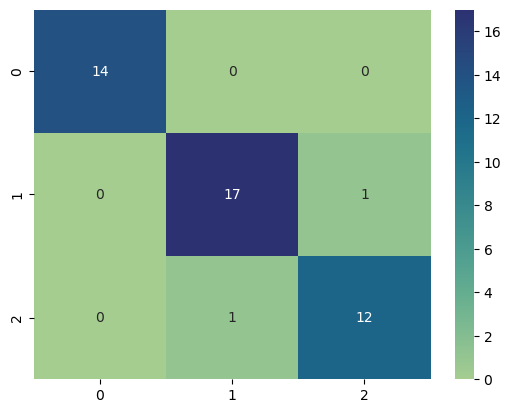

In [23]:
cm=confusion_matrix(y_test,y_pred)
print(cm)
sns.heatmap(cm,annot=True,cmap='crest',fmt='d')
plt.show()

In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.94      0.94      0.94        18
           2       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



In [25]:
pkl.dump(rf_classifier,open('D:\sofronics\models\model.pkl','wb'))

In [26]:
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [27]:
#load  the model pkl
with open('D:\sofronics\models\model.pkl','rb')as model_file:
    model_data=pkl.load(model_file)
    
#load the scaler.pkl
with open('D:\sofronics\models\scaler.pkl','rb')as scaler_file:
    data=pkl.load(scaler_file)
    
#Normalize using standard scaler
sample_input=np.array([2.0,5.8,2.8,4.2]).reshape(-1,4)
processdata=data.transform(sample_input)

#reshape(-1,4), the array will be reshaped into a 2D array with four columns

#find ypred
model_predict=model_data.predict(processdata)


#print the predicted class with decoded category label

if model_predict==0:
    print('Iris-setosa')
elif model_predict==1:
    print('Iris-versicolor')
else:
    print('Iris-virginica')

Iris-setosa


C:\Users\pc\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\pc\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
